In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors.kde import KernelDensity
import matplotlib.pyplot as plt

parse_date = lambda str_data: str_data[2:]
data = pd.read_csv("anonymized.csv", converters={0: parse_date})
data.head()

counts = data["Date"].value_counts()
processed_counts = np.array(counts).reshape(-1, 1)
print(counts[:5])
print(processed_counts[:5])

kde = KernelDensity(kernel='gaussian', bandwidth=4).fit(processed_counts)

plt_range = np.linspace(0, 110, 300).reshape(-1, 1)
density_samples = kde.score_samples(plt_range)
plt.fill(plt_range[:, 0], np.exp(density_samples), fc='#AAAAFF')

n_samples = 50
samples = kde.sample(n_samples, random_state=1)
print(samples[1:10, 0])
plt.scatter(samples[:, 0], [1]*n_samples, c='red')
plt.scatter(processed_counts[:, 0], [0]*processed_counts.shape[0], c='blue')
plt.show()

In [41]:
import pandas as pd
import numpy as np
from sklearn.neighbors.kde import KernelDensity
import matplotlib.pyplot as plt

In [20]:
parse_date = lambda str_data: str_data[2:]
data = pd.read_csv("anonymized.csv", converters={0: parse_date})
data.head()

,Date,Amount
0,May2016,54241.35
1,May2017,54008.83
2,Jun2017,54008.82
3,Jan2017,52704.37
4,Feb2017,52704.36


In [158]:
counts = data["Date"].value_counts()
processed_counts = np.array(counts).reshape(-1, 1)
print(counts[:5])
processed_counts

Dec2014    106
Jan2015     96
Mar2017     88
Nov2016     86
Apr2017     78
Name: Date, dtype: int64


array([[106],
       [ 96],
       [ 88],
       [ 86],
       [ 78],
       [ 75],
       [ 73],
       [ 73],
       [ 68],
       [ 64],
       [ 64],
       [ 64],
       [ 62],
       [ 61],
       [ 59],
       [ 59],
       [ 59],
       [ 58],
       [ 57],
       [ 55],
       [ 54],
       [ 53],
       [ 52],
       [ 52],
       [ 51],
       [ 48],
       [ 48],
       [ 47],
       [ 45],
       [ 45],
       [ 44],
       [ 44],
       [ 43],
       [ 41],
       [ 40],
       [ 40],
       [ 39],
       [ 38],
       [ 38],
       [ 36],
       [ 34],
       [ 33],
       [ 32],
       [ 32],
       [ 27],
       [ 23],
       [ 16],
       [ 10],
       [  8]])

In [70]:
kde = KernelDensity(kernel='gaussian', bandwidth=4).fit(processed_counts)

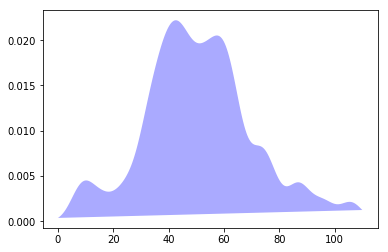

In [77]:
plt_range = np.linspace(0, 110, 300).reshape(-1, 1)
density_samples = kde.score_samples(plt_range)
plt.fill(plt_range[:, 0], np.exp(density_samples), fc='#AAAAFF')

[ 34.33126085  57.59752329  72.57889484  67.60636288  66.00997736
  78.6034238   56.26508856 105.5084391   55.25692226]


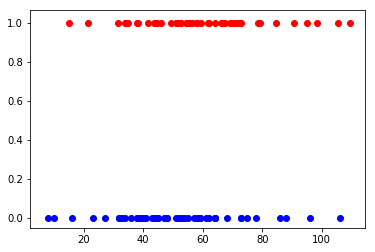

In [92]:
n_samples = 50
samples = kde.sample(n_samples, random_state=1)
print(samples[1:10, 0])
plt.scatter(samples[:, 0], [1]*n_samples, c='red')
plt.scatter(processed_counts[:, 0], [0]*processed_counts.shape[0], c='blue')
plt.show()

### Expectation-Maximization


In [128]:
true_p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(true_p_cluster)

true_biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
true_people = np.random.choice(range(n_clusters), size=n_people, p=true_p_cluster)

answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = true_people[a]
    answers[a, :] = np.random.rand(n_questions) < true_biases[:, cluster]

print(true_people)

np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", true_people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", true_biases, delimiter=",", fmt="%.3f")

[0 1 0 1 1 0 1 0 1 1 0 1 1 0 3 0 0 2 2 0 2 3 2 0 2 2 3 1 1 0 3 2 3 3 0 1 0
 1 2 2 2 1 3 1 0 1 1 1 1 0 1 0 3 2 2 3 2 2 1 1 3 2 3 1 3 3 3 3 2 1 0 3 0 3
 3 3 1 2 0 2 0 1 1 1 1 2 0 0 1 3 2 0 0 3 0 2 3 0 1 3 0 1 0 1 3 1 0 1 2 0 1
 0 3 0 3 0 2 1 3 2 0 0 0 3 2 1 2 2 1 0 3 0 1 3 0 3 2 0 0 0 1 0 0 1 0 2 3 0
 0 0 1 1 0 0 0 3 1 2 3 1 1 3 1 1 1 3 1 2 0 0 0 0 0 0 3 1 1 2 0 3 3 0 2 0 1
 3 0 0 0 2 0 0 3 3 2 0 2 0 2 0 1 0 0 1 3 0 0 3 1 1 1 1 3 1 0 3 0 0 2 2 1 0
 1 0 1 0 1 0 3 0 0 2 3 0 1 0 1 1 2 0 3 2 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1
 0 3 1 3 2 0 1 0 1 3 1 0 0 0 3 1 0 3 0 0 3 0 3 1 1 0 1 1 2 1 1 0 0 1 1 1 2
 1 1 1 3 2 2 0 0 0 0 2 1 0 1 3 3 3 2 1 2 2 0 0 3 0 3 0 0 3 2 0 2 2 1 0 1 1
 3 3 1 1 3 1 3 0 0 3 0 3 1 2 0 1 0 0 0 0 3 2 0 2 1 0 0 1 1 2 0 1 0 1 0 1 0
 0 3 1 0 1 3 0 0 0 0 0 0 1 1 2 0 2 0 0 1 1 0 1 1 1 0 2 0 2 1 3 0 0 2 3 3 2
 0 2 0 1 0 0 2 2 0 0 1 0 0 2 2 1 1 3 0 1 0 2 0 2 0 0 0 0 3 3 2 0 0 3 1 3 2
 2 0 1 3 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 2 1 3 0 2 3 2 2 0 1 0 1 0 0 0 1 1
 3 0 0 0 1 0 2 1 1 3 1 1 

In [156]:
answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.40, 0.40, 0.10, 0.10])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))

def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.

    # This is probably not the correct answer!
    people = np.zeros((n_people, n_clusters))
    
    for person_index in range(n_people):
        person_answer = answers[person_index]
    
        for cluster_index in range(n_clusters):
            
            p_cluster_given_answer = p_clusters[cluster_index] # set the prior
            for i, question_answer in enumerate(person_answer):
                
                # Conjuction of the probabiility of observing each answer
                p_cluster_given_answer *= (question_answer*biases[i, cluster_index] +\
                                          (1-question_answer)*(1-biases[i, cluster_index]))
                
            
            people[person_index, cluster_index] = p_cluster_given_answer
            
            

    # normalize the distributions to accoun
    # for the proportionality
    people = people / people.sum(axis=1, keepdims=1)
    return people

def maximization(answers, people, biases, p_clusters):
    # Treating all the data as visible, now infer the parameters for the model.
    
    # Maximize biases likelihood
    # the probability of a yes answer to a specific question given the clutser
    for question_index in range(n_questions):
        for cluster_index in range(n_clusters):
            
            weighted_numerator = 0
            weighted_denominator = 0
            
            for person_index in range(n_people):
                answer = answers[person_index, question_index]
                weighted_answer = 1*people[person_index, cluster_index]
                
                weighted_numerator += answer * weighted_answer
                weighted_denominator += weighted_answer
            
            biases[question_index, cluster_index] = float(weighted_numerator)/weighted_denominator
    
    # Maximize cluster priors
    unnormalized_membership_mass = np.zeros(4)
    
    for cluster_index in range(n_clusters):
        for person_index in range(n_people):
            unnormalized_membership_mass[cluster_index] += people[person_index, cluster_index]
        
    p_clusters = unnormalized_membership_mass/np.sum(unnormalized_membership_mass)  
    
    return biases, p_clusters


for step in range(20):
    people = expectation(answers, biases, p_clusters)
    biases, p_clusters = maximization(answers, people, biases, p_clusters)

print(true_p_cluster)
print(p_clusters)
print()
print(biases)
print()
print(people)

[0.4  0.3  0.15 0.15]
[0.30231769 0.15791713 0.37348663 0.16627856]

[[7.66551213e-01 5.07010441e-01 2.60175276e-01 6.67677134e-01]
 [7.35677595e-01 8.85702873e-01 2.01431121e-01 8.44920525e-01]
 [5.68087992e-01 1.00000000e+00 4.90662786e-01 5.04175261e-04]
 [3.73421760e-01 3.19636036e-01 4.51368156e-01 3.19055103e-01]
 [8.35590741e-01 8.03055043e-01 2.56233846e-02 4.22433841e-17]
 [3.61046536e-01 5.41412992e-01 3.35879763e-01 5.46698641e-01]
 [8.33890603e-01 2.51617147e-01 9.30227456e-02 3.21284435e-01]
 [6.99211832e-01 4.47834388e-01 6.09549462e-01 4.22403250e-01]
 [8.95028350e-02 5.54042014e-01 1.91521549e-01 9.67763079e-01]
 [3.28193445e-02 4.42671453e-01 7.88827555e-01 6.34849404e-02]
 [1.20322529e-01 3.59498304e-01 3.69899883e-01 1.48550555e-01]
 [2.12777441e-01 3.31634791e-01 1.93717051e-01 3.24468018e-01]
 [2.38795979e-01 3.00824309e-01 3.59454912e-01 2.64921941e-01]
 [1.03503910e-01 1.35219634e-01 7.74972023e-01 9.91792078e-01]
 [6.39705101e-01 8.82701197e-01 4.55813778e-01 7.

In [155]:
probabilistic_assignment = np.argmax(people, axis=1)

assigned_p = p_clusters[probabilistic_assignment]

true_p_cluster = np.array(true_p_cluster)
true_p = true_p_cluster[true_people.astype(int)]

scores = np.unique(np.abs(assigned_p - true_p) > 0.05, return_counts=True)[1]
print("Accuracy: ", scores[0]/np.sum(scores))

Accuracy:  0.968
